# DMGs for hypoxia and control treatments 
All the oysters included in this analysis have experienced hypoxia or control treatments for either phase 1 and/or phase 2. No other treatments (both, warm) are included in this analysis.

#### 08/27/2024
futher investigating DESeq results based on notes from SGW 

first, loading in the dataframes originally generated in deseq_analysis.ipynb that are needed for DESeq
- these would include the counts matrix and meta data

In [2]:
# loading required packages
library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)
library(dplyr)
library(ggh4x)

In [3]:
counts <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/counts_formatted.csv')
head(counts)

,X,BBB.WBO.B21,BBB.WBV.B70,BBO.BBO.B16,BBO.BBY.B27,BBO.WBO.B16,BBO.WBV.B64,BBR.BBB.B50,BBR.BBG.B38,BBR.BBY.B26,⋯,WBR.BBY.W25,WBV.WBO.W23,WBV.WBR.W12,WBY.BBV.W65,WBY.BBY.W30,WPB.BPG.G45,WPO.BPO.G16,WPO.BPY.G28,WPR.BPY.G25,WPV.BPR.G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111120752,2,2,0,0,2,0,0,0,1,⋯,0,0,0,0,1,0,0,1,1,0
2,LOC111109452,0,0,0,0,1,1,10,12,0,⋯,0,1,0,1,2,15,0,0,3,0
3,LOC111124802,597,453,408,244,502,434,187,336,311,⋯,122,120,57,289,202,168,134,86,252,9
4,LOC111101273,173,146,115,75,171,158,64,115,137,⋯,43,45,18,87,81,71,52,38,73,1
5,LOC111101250,253,255,257,118,327,269,115,141,184,⋯,91,96,24,254,109,92,49,5,101,2
6,LOC111101262,645,634,502,364,647,677,246,389,355,⋯,184,146,52,387,251,188,131,78,283,12


In [4]:
# removing the extra info from the file name
cleaned_column_names <- gsub("^X2018\\.\\.", "", gsub("\\.CV_alignment\\.sam$", "", colnames(counts)))
head(cleaned_column_names)

# replace the '.' with '-'
cleaned_column_names2 <- gsub('\\.', "-", cleaned_column_names)
head(cleaned_column_names2)

# now assigning to the columns
colnames(counts) = cleaned_column_names2
head(counts)

[1] "X"           "BBB.WBO.B21" "BBB.WBV.B70" "BBO.BBO.B16" "BBO.BBY.B27"
[6] "BBO.WBO.B16"

[1] "X"           "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27"
[6] "BBO-WBO-B16"

,X,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111120752,2,2,0,0,2,0,0,0,1,⋯,0,0,0,0,1,0,0,1,1,0
2,LOC111109452,0,0,0,0,1,1,10,12,0,⋯,0,1,0,1,2,15,0,0,3,0
3,LOC111124802,597,453,408,244,502,434,187,336,311,⋯,122,120,57,289,202,168,134,86,252,9
4,LOC111101273,173,146,115,75,171,158,64,115,137,⋯,43,45,18,87,81,71,52,38,73,1
5,LOC111101250,253,255,257,118,327,269,115,141,184,⋯,91,96,24,254,109,92,49,5,101,2
6,LOC111101262,645,634,502,364,647,677,246,389,355,⋯,184,146,52,387,251,188,131,78,283,12


In [5]:
# setting the gene name as the row name and deleting that column
rownames(counts) <- counts$X
counts2 <- counts[-1]

head(counts2)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,2,2,0,0,2,0,0,0,1,0,⋯,0,0,0,0,1,0,0,1,1,0
LOC111109452,0,0,0,0,1,1,10,12,0,2,⋯,0,1,0,1,2,15,0,0,3,0
LOC111124802,597,453,408,244,502,434,187,336,311,110,⋯,122,120,57,289,202,168,134,86,252,9
LOC111101273,173,146,115,75,171,158,64,115,137,45,⋯,43,45,18,87,81,71,52,38,73,1
LOC111101250,253,255,257,118,327,269,115,141,184,49,⋯,91,96,24,254,109,92,49,5,101,2
LOC111101262,645,634,502,364,647,677,246,389,355,108,⋯,184,146,52,387,251,188,131,78,283,12


In [6]:
head(counts2, 50)


,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,2,2,0,0,2,0,0,0,1,0,⋯,0,0,0,0,1,0,0,1,1,0
LOC111109452,0,0,0,0,1,1,10,12,0,2,⋯,0,1,0,1,2,15,0,0,3,0
LOC111124802,597,453,408,244,502,434,187,336,311,110,⋯,122,120,57,289,202,168,134,86,252,9
LOC111101273,173,146,115,75,171,158,64,115,137,45,⋯,43,45,18,87,81,71,52,38,73,1
LOC111101250,253,255,257,118,327,269,115,141,184,49,⋯,91,96,24,254,109,92,49,5,101,2
LOC111101262,645,634,502,364,647,677,246,389,355,108,⋯,184,146,52,387,251,188,131,78,283,12
LOC111133260,14,15,67,30,22,20,34,39,57,6,⋯,13,19,5,72,30,33,17,56,6,1
LOC111113503,36,29,27,17,85,40,13,15,19,5,⋯,13,10,3,27,25,30,5,1,3,0
LOC111102393,73,54,36,12,48,48,30,49,31,14,⋯,20,9,10,24,17,36,14,3,26,41


In [7]:
meta <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/CV_CE18_meta.csv')

# changing rownames to the unique sample ID
rownames(meta) <- meta$unique_ID

meta$treatment <- paste(meta$Phase1, meta$Phase2, sep = "_")

# pulling out only the rows I need
meta <- select(meta, Phase1, Phase2, treatment)
head(meta)

,Phase1,Phase2,treatment
,<chr>,<chr>,<chr>
BBB-WBO-B21,hypoxic,control,hypoxic_control
BBB-WBV-B70,hypoxic,control,hypoxic_control
BBO-BBO-B16,hypoxic,hypoxic,hypoxic_hypoxic
BBO-BBY-B27,hypoxic,hypoxic,hypoxic_hypoxic
BBO-WBO-B16,hypoxic,control,hypoxic_control
BBO-WBV-B64,hypoxic,control,hypoxic_control


In [8]:
# setting the same order for counts matrix and meta data
counts2 <- counts2[,rownames(meta)]
all(rownames(meta) == colnames(counts2))

[1] TRUE

now ready for analysis

## Making *all* pairwise comparisons
we want to look at all pairwise comparisons, just to get the full picture..

these include:
- control control vs. hypoxic hypoxic
- hypoxic control vs. control hypoxic

In [9]:
# removing warm both and both both samples
meta_filtered <- filter(meta, meta$Phase2 != 'both')

# need to remove them from counts as well
counts_filtered <- counts2[, colnames(counts2) %in% rownames(meta_filtered)]

dim(meta_filtered)
dim(counts_filtered)

[1] 20  3

[1] 13544    20

In [10]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                              colData = meta_filtered, 
                              design = ~ treatment)
dds=DESeq(dds)
resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                                   
[2] "treatment_control_hypoxic_vs_control_control"
[3] "treatment_hypoxic_control_vs_control_control"
[4] "treatment_hypoxic_hypoxic_vs_control_control"

### control control vs. hypoxic hypoxic
CC vs. HH

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 2, 0.015%
LFC < -0.25 (down) : 1, 0.0074%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



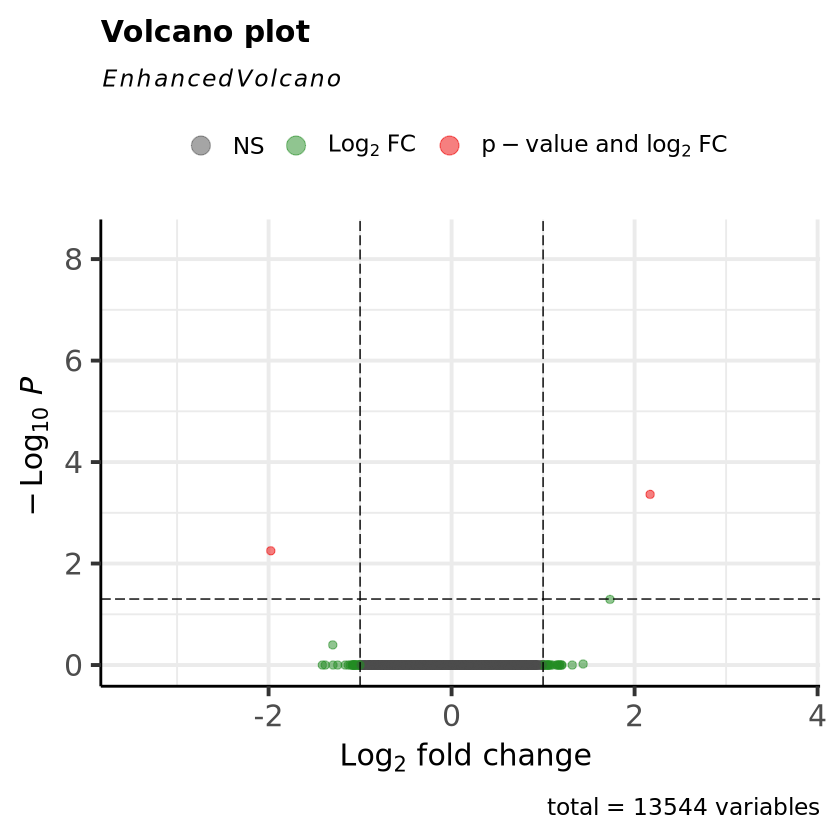

In [11]:
# control control vs. hypoxic hypoxic

contrast2 <- c("treatment", "hypoxic_hypoxic", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls<-lfcShrink(dds, # dds object
                      contrast = contrast2, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls)

EnhancedVolcano(ls, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

1 DMGs for control control

2 DMGs for hypoxic hypoxic

In [12]:
write.csv(as.data.frame(ls), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HH.csv")

### hypoxic control vs. control control
HC vs. CC

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 6, 0.044%
LFC < -0.25 (down) : 24, 0.18%
outliers [1]       : 294, 2.2%
low counts [2]     : 5765, 43%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



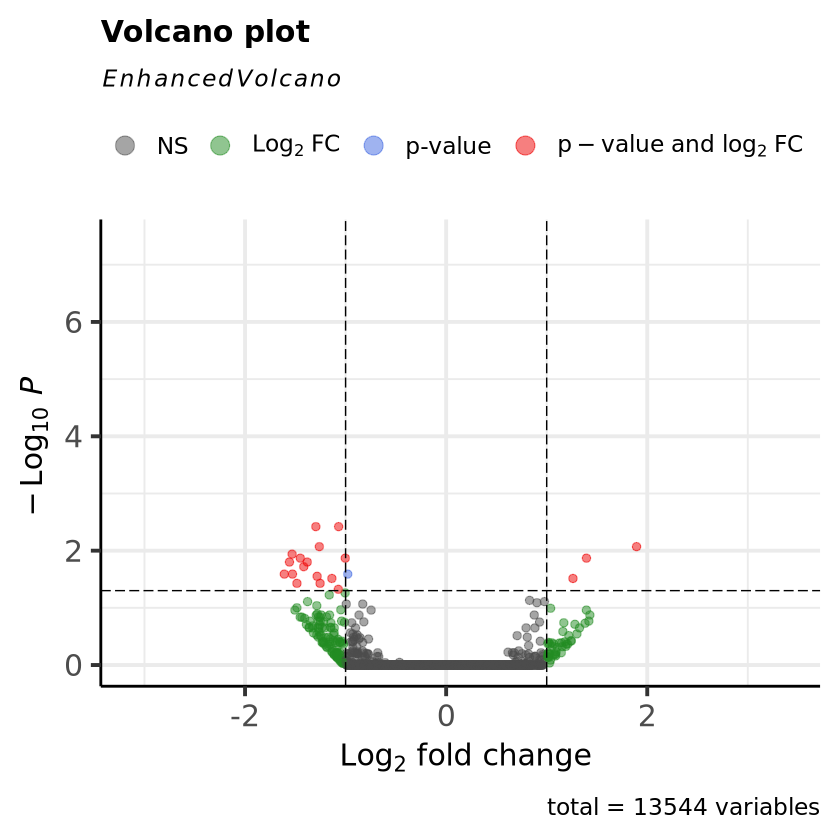

In [13]:
# hypoxic control vs. control control

contrast3 <- c("treatment", "hypoxic_control", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls2<-lfcShrink(dds, # dds object
                      contrast = contrast3, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls2)

EnhancedVolcano(ls2, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

6 DMGs for hypoxic control

24 DMGs for control control

In [14]:
write.csv(as.data.frame(ls2), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HC.csv")

### control hypoxic vs. control control
CH vs. CC

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 1, 0.0074%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



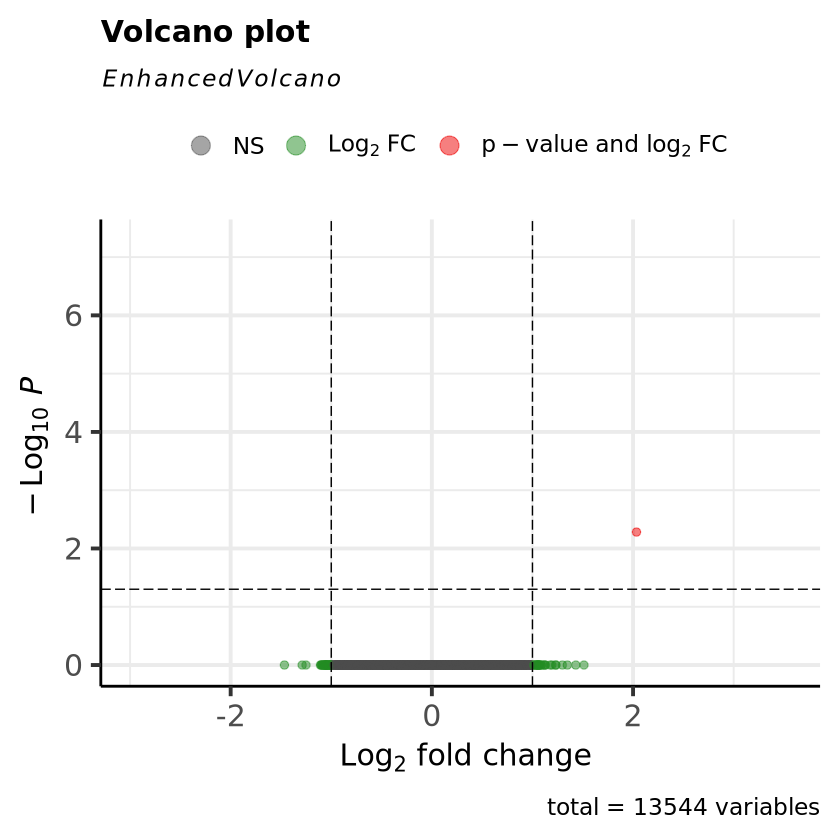

In [15]:
# control hypoxic vs. control control

contrast4 <- c("treatment", "control_hypoxic", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls3<-lfcShrink(dds, # dds object
                      contrast = contrast4, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls3)

EnhancedVolcano(ls3, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

1 DMGs for control hypoxic

0 DMGs for control control

In [16]:
write.csv(as.data.frame(ls3), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_CH.csv")

### hypoxic hypoxic vs. hypoxic control
HH vs. HC

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 136, 1%
LFC < -0.25 (down) : 30, 0.22%
outliers [1]       : 294, 2.2%
low counts [2]     : 4264, 32%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



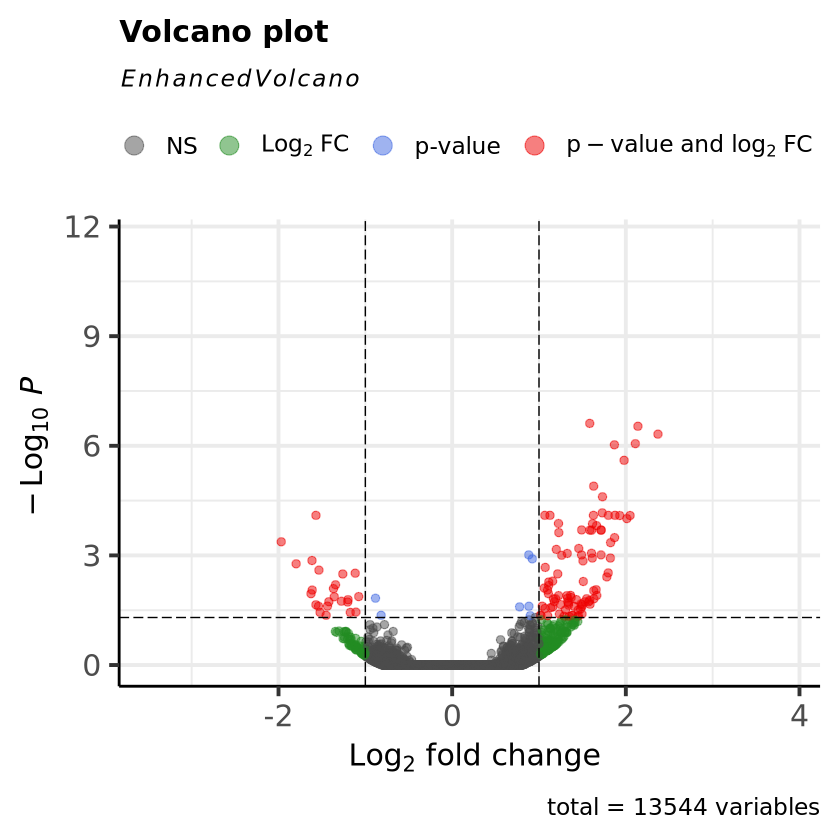

In [17]:
# hypoxic hypoxic vs. hypoxic control

contrast5 <- c("treatment", "hypoxic_hypoxic", "hypoxic_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls4<-lfcShrink(dds, # dds object
                      contrast = contrast5, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls4)

EnhancedVolcano(ls4, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

136 DMGs for hypoxic hypoxic

30 DMGs for hypoxic control

In [18]:
write.csv(as.data.frame(ls4), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_HC.csv")

### hypoxic hypoxic vs. control hypoxic
HH vs. CH

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 0, 0%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 8)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



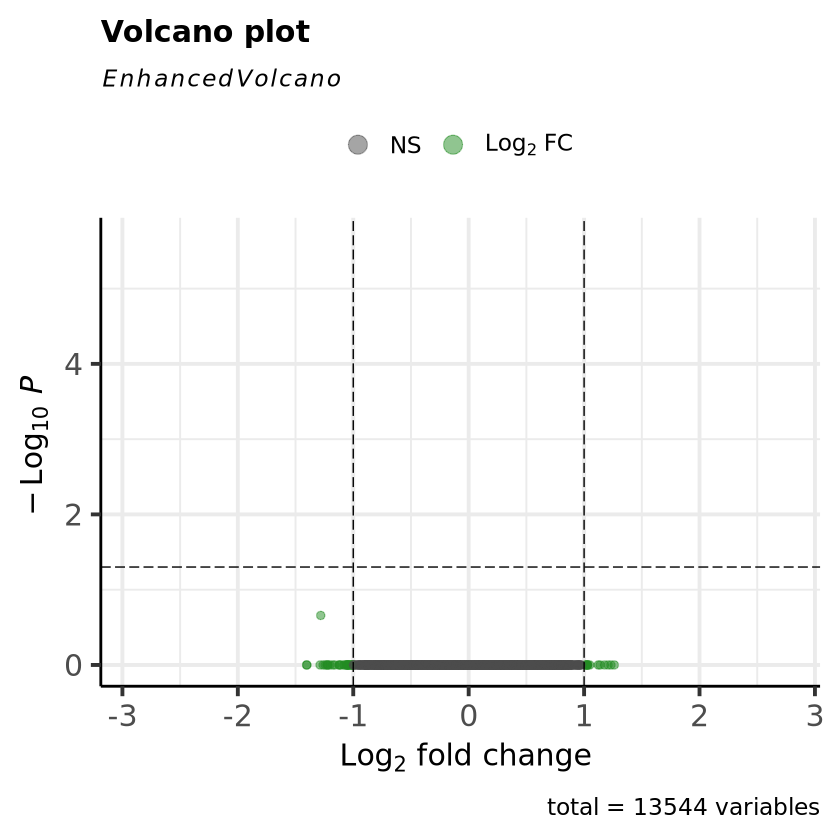

In [19]:
# hypoxic hypoxic vs. control hypoxic

contrast6 <- c("treatment", "hypoxic_hypoxic", "control_hypoxic")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls5<-lfcShrink(dds, # dds object
                      contrast = contrast6, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls5)

EnhancedVolcano(ls5, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

0 DMGs for hypoxic hypoxic

0 DMGs for control hypoxic

In [20]:
write.csv(as.data.frame(ls5), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_CH.csv")

### hypoxic control vs. control hypoxic
HC vs. CH

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 146, 1.1%
LFC < -0.25 (down) : 241, 1.8%
outliers [1]       : 294, 2.2%
low counts [2]     : 4506, 33%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



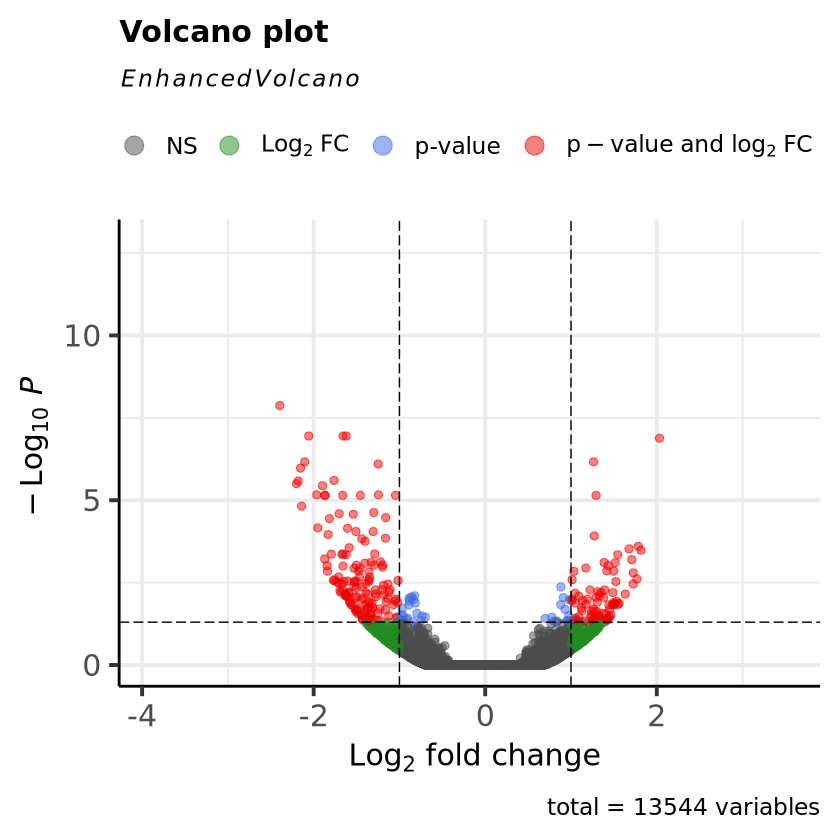

In [21]:
# hypoxic control vs. control hypoxic

contrast9 <- c("treatment", "hypoxic_control", "control_hypoxic")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls6<-lfcShrink(dds, # dds object
                      contrast = contrast9, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls6)

EnhancedVolcano(ls6, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

146 DMGs for hypoxic control

241 DMGs for control hypoxic

so there is a difference in methylation for *when* you experience hypoxic stress

In [22]:
write.csv(as.data.frame(ls6), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CH_vs_HC.csv")

### Phase 1 control vs. hypoxic
Cx vs. Hx

In [23]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p1_dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                                 colData = meta_filtered,
                                 design = ~Phase1)
p1_dds=DESeq(p1_dds)
resultsNames(p1_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 584 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                 "Phase1_hypoxic_vs_control"

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13508 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 0, 0%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 561, 4.2%
low counts [2]     : 23, 0.17%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



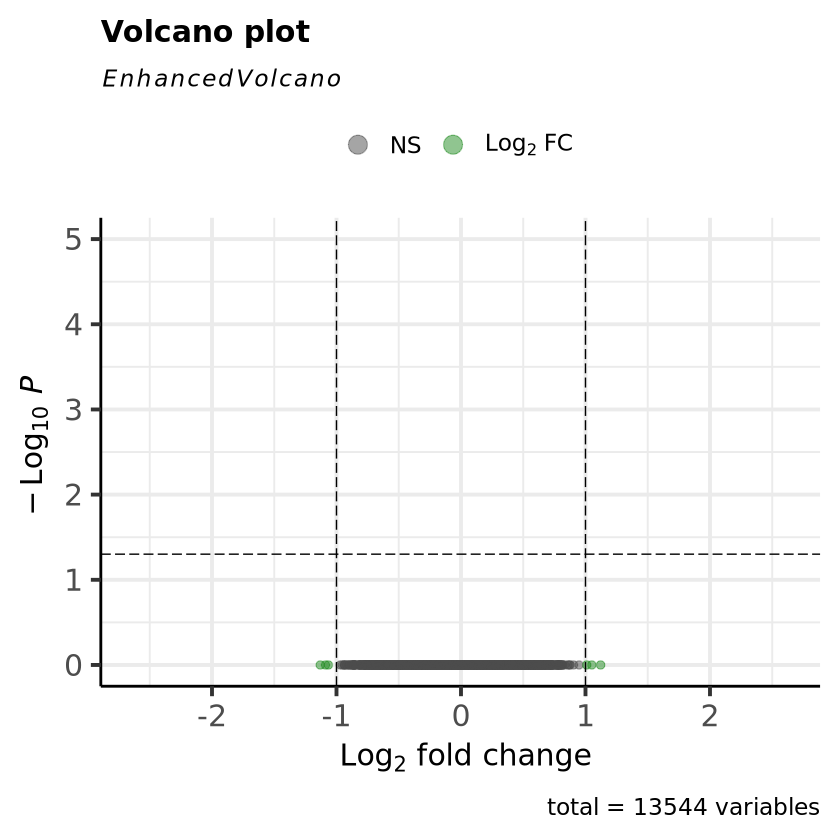

In [24]:
# phase 1 hypoxic vs. control

contrast7 <- c("Phase1", "hypoxic", "control")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls7<-lfcShrink(p1_dds, # dds object
                      contrast = contrast7, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls7)

EnhancedVolcano(ls7, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

0 DMGs for phase 1 hypoxic

0 DMGs for phase 1 control

In [25]:
write.csv(as.data.frame(ls7), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/Hx_vs_Cx.csv")

### Phase 2 control vs. hypoxic
xC vs. xH

In [26]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p2_dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                              colData = meta_filtered, 
                              design = ~ Phase2)
p2_dds=DESeq(p2_dds)
resultsNames(p2_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 548 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                 "Phase2_hypoxic_vs_control"

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13499 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 26, 0.19%
LFC < -0.25 (down) : 10, 0.074%
outliers [1]       : 515, 3.8%
low counts [2]     : 2288, 17%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



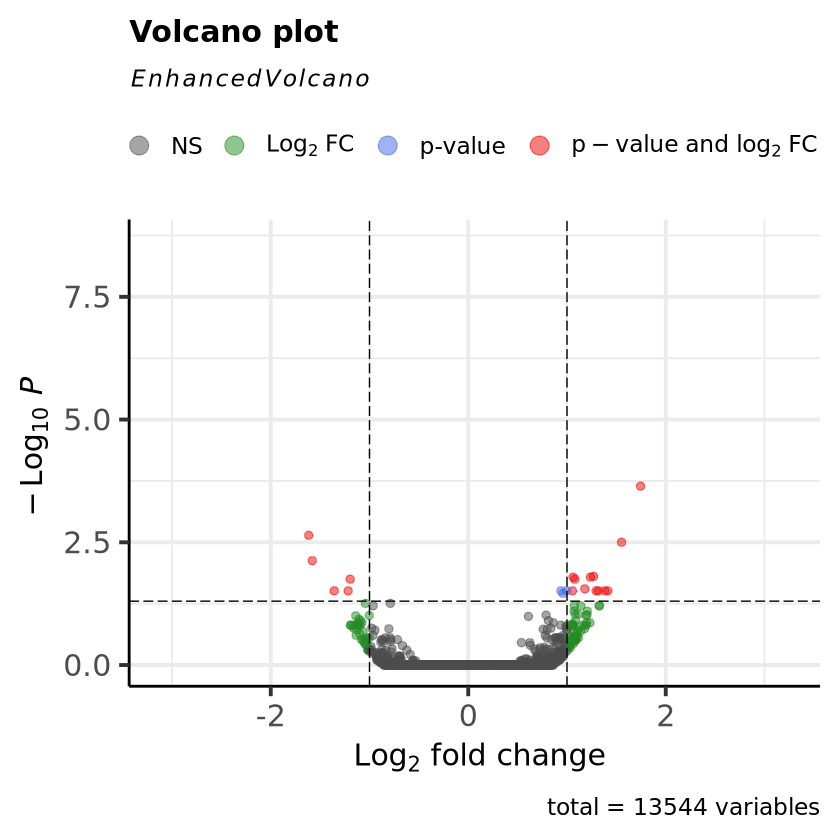

In [27]:
# phase 2 hypoxic vs. control

contrast8 <- c("Phase2", "hypoxic", "control")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls8<-lfcShrink(p2_dds, # dds object
                      contrast = contrast8, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls8)

EnhancedVolcano(ls8, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

26 DMGs for phase 2 hypoxic

10 DMGs for phase 2 control

In [28]:
write.csv(as.data.frame(ls8), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/xH_vs_xC.csv")

## NMDS Plot
using DESeq2 dds object (which used the argument design=~treatment)

In [29]:
# MDS plot

# normalization & transformation
vsd <- vst(dds)

# calculate sample distances
sample_dists <- assay(vsd) %>%
t() %>%
dist() %>%
as.matrix()

head(sample_dists)

# calculate MDS value from distance matrix
mdsData <- data.frame(cmdscale(sample_dists))
mds <- cbind(mdsData, as.data.frame(colData(vsd))) # combine with sample data
head(mds)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
BBB-WBO-B21,0.00000,18.84577,20.92953,20.96794,18.21364,18.11468,20.63180,19.75147,20.22578,18.92113,19.59980,22.22072,22.99473,25.76891,19.89501,22.74966,21.92330,24.57036,22.87723,22.23458
BBB-WBV-B70,18.84577,0.00000,19.18891,20.44833,18.37856,18.70862,18.49159,19.88195,19.52910,22.14748,19.82340,21.78769,23.04090,27.07967,19.68026,20.36870,21.60692,24.96069,22.56522,21.60935
BBO-BBO-B16,20.92953,19.18891,0.00000,18.48364,18.67343,20.61852,17.09182,17.92361,16.80276,22.11230,19.36438,18.71328,20.35510,27.10422,18.51823,19.93818,19.39514,22.60180,18.58325,18.38694
BBO-BBY-B27,20.96794,20.44833,18.48364,0.00000,20.06915,19.96350,18.48062,18.78633,16.63747,23.02284,19.67587,19.59168,21.10106,26.91646,19.63858,21.92601,21.00382,23.25080,18.86815,17.57746
BBO-WBO-B16,18.21364,18.37856,18.67343,20.06915,0.00000,18.29444,19.18185,19.88428,18.89404,20.74670,18.86631,21.12054,22.26473,26.68688,18.52538,21.98739,20.68327,23.12099,20.82959,20.82289
BBO-WBV-B64,18.11468,18.70862,20.61852,19.96350,18.29444,0.00000,20.41040,20.58917,18.89354,21.39994,17.71932,21.61194,22.00616,25.44915,19.60662,22.17830,22.25292,24.32149,22.19753,21.13937


,X1,X2,Phase1,Phase2,treatment,sizeFactor
,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>
BBB-WBO-B21,-5.843530,-7.9131927,hypoxic,control,hypoxic_control,2.383679
BBB-WBV-B70,-2.252235,-5.9162123,hypoxic,control,hypoxic_control,2.070380
BBO-BBO-B16,3.785809,0.6607293,hypoxic,hypoxic,hypoxic_hypoxic,1.679982
BBO-BBY-B27,2.993232,2.0566212,hypoxic,hypoxic,hypoxic_hypoxic,1.131588
BBO-WBO-B16,-1.893454,-5.7008254,hypoxic,control,hypoxic_control,2.459313
BBO-WBV-B64,-5.037877,-4.4132410,hypoxic,control,hypoxic_control,2.191596


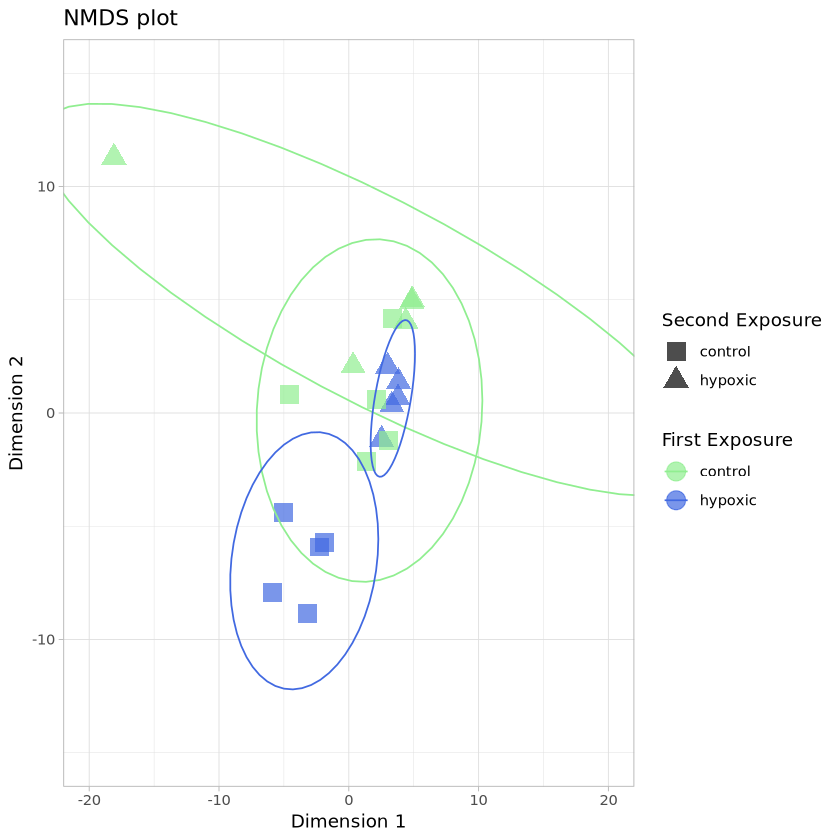

In [30]:
# plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "NMDS plot", x = "Dimension 1", y = "Dimension 2", color = "First Exposure", shape = "Second Exposure") +
stat_ellipse() +
theme_light()

Dimension 1 explains 13.31 % of variation
Dimension 2 explains 10.58 % of variation


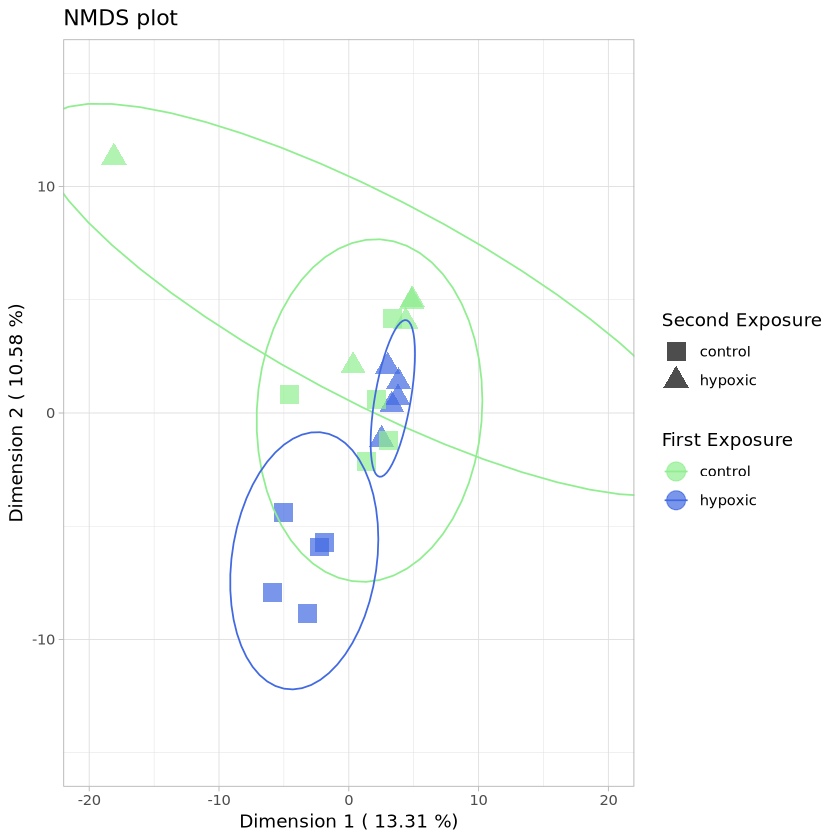

In [31]:
# Calculate eigenvalues
eigenvalues <- cmdscale(sample_dists, k = 2, eig = TRUE)$eig

# Calculate percentage variation explained
variation_explained <- (eigenvalues / sum(eigenvalues)) * 100

# Print results
cat("Dimension 1 explains", round(variation_explained[1], 2), "% of variation\n")
cat("Dimension 2 explains", round(variation_explained[2], 2), "% of variation\n")

# Add labels to plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
  scale_shape_manual(values = c(15, 17)) +
  coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
  scale_color_manual(values = c('lightgreen','royalblue')) +
  labs(title = "NMDS plot", 
       #subtitle = paste("Dimension 1:", round(variation_explained[1], 2), "%, Dimension 2:", round(variation_explained[2], 2), "%"),
       x = paste("Dimension 1 (", round(variation_explained[1], 2), "%)"), 
       y = paste("Dimension 2 (", round(variation_explained[2], 2), "%)"),
       color = "First Exposure", 
       shape = "Second Exposure") +
  stat_ellipse() +
  theme_light()

when considering all methylated loci, methylation status explains 23.89% of variation

same plot as above, but want to add sample names to the plot so I can check out the 'outlier' point

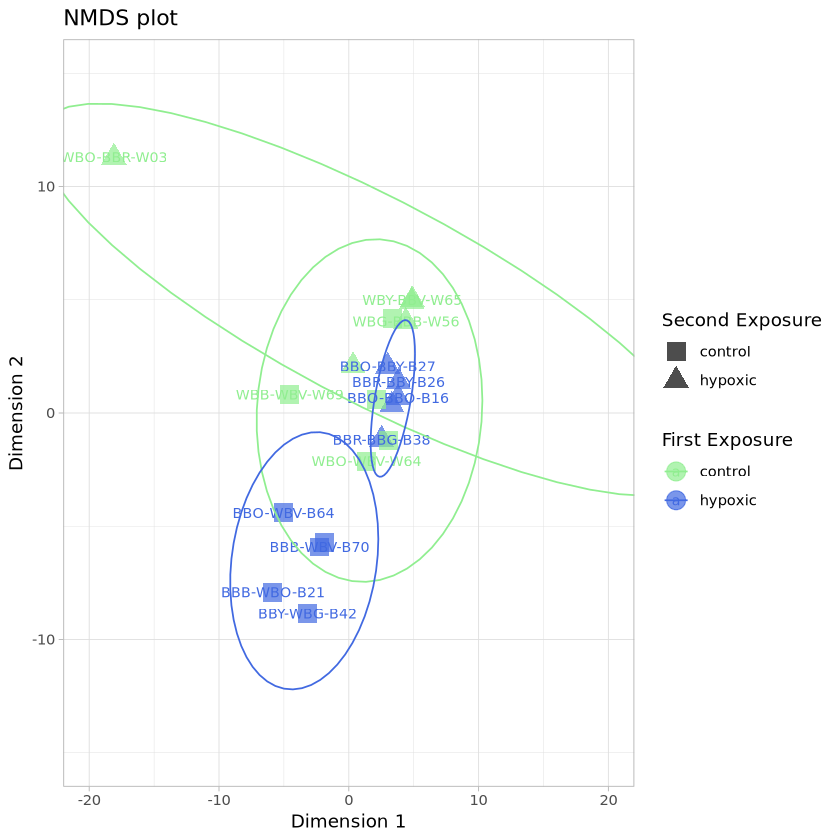

In [32]:
# extract sample names
sample_names <- rownames(mds)
# add sample names to mds data frame
mds$Sample <- sample_names

# plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
  geom_text(aes(label = Sample), check_overlap = TRUE, size = 3) +
labs(title = "NMDS plot", x = "Dimension 1", y = "Dimension 2", color = "First Exposure", shape = "Second Exposure") +
stat_ellipse() +
theme_light()

doing the same NMDS plot but only for genes that were identified as sig. DM in any pairwise comparison

In [33]:
# CC vs. HC
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HC.csv')
df1 <- filter(CC_HC, padj < 0.05)
rownames(df1) <- df1$X

# CH_HC
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CH_vs_HC.csv')
df2 <- filter(CH_HC, padj < 0.05)
rownames(df2) <- df2$X

# HH_HC
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_HC.csv')
df3 <- filter(HH_HC, padj < 0.05)
rownames(df3) <- df3$X

# HH_CH
HH_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_CH.csv')
df4 <- filter(HH_CH, padj < 0.05)
rownames(df4) <- df4$X

# HH_CC
HH_CC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HH.csv')
df5 <- filter(HH_CC, padj < 0.05)
rownames(df5) <- df5$X

# CC_CH
CC_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_CH.csv')
df6 <- filter(CC_CH, padj < 0.05)
rownames(df6) <- df6$X

# Define the list of dataframes containing DMGs
dmg_dfs <- list(df1, df2, df3, df4, df5, df6)

# Extract unique gene names from all dataframes
all_dmg_genes <- unique(unlist(lapply(dmg_dfs, function(x) rownames(x))))

,X1,X2,Phase1,Phase2,treatment,sizeFactor
,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>
BBB-WBO-B21,-3.432157,0.18207929,hypoxic,control,hypoxic_control,2.383679
BBB-WBV-B70,-2.702244,0.12118211,hypoxic,control,hypoxic_control,2.070380
BBO-BBO-B16,1.141489,0.78696970,hypoxic,hypoxic,hypoxic_hypoxic,1.679982
BBO-BBY-B27,1.058554,0.76442112,hypoxic,hypoxic,hypoxic_hypoxic,1.131588
BBO-WBO-B16,-2.767102,0.20281612,hypoxic,control,hypoxic_control,2.459313
BBO-WBV-B64,-2.926660,0.06603251,hypoxic,control,hypoxic_control,2.191596


Dimension 1 explains 52.26 % of variation
Dimension 2 explains 9.35 % of variation


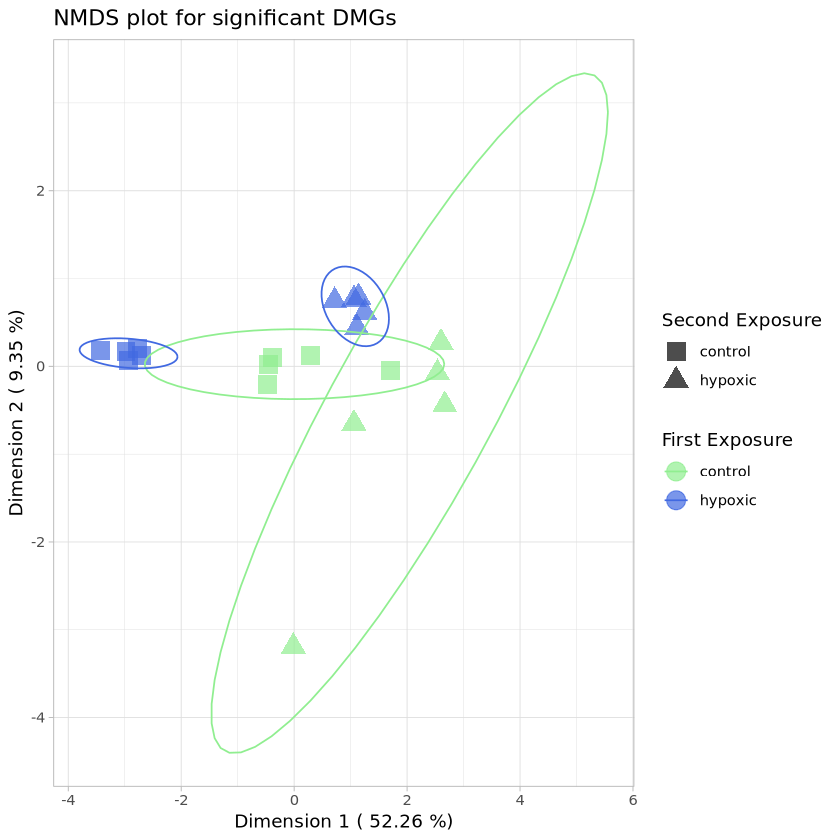

In [34]:
# MDS plot

# normalization & transformation
vsd <- vst(dds)

vsd_sig <- vsd[all_dmg_genes, ]

# calculate sample distances
sample_dists <- assay(vsd_sig) %>%
t() %>%
dist() %>%
as.matrix()

# calculate MDS value from distance matrix
mdsData <- data.frame(cmdscale(sample_dists))
mds <- cbind(mdsData, as.data.frame(colData(vsd_sig))) # combine with sample data
head(mds)

# Calculate eigenvalues
eigenvalues <- cmdscale(sample_dists, k = 2, eig = TRUE)$eig

# Calculate percentage variation explained
variation_explained <- (eigenvalues / sum(eigenvalues)) * 100

# Print results
cat("Dimension 1 explains", round(variation_explained[1], 2), "% of variation\n")
cat("Dimension 2 explains", round(variation_explained[2], 2), "% of variation\n")

# plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "NMDS plot for significant DMGs", 
     x = paste("Dimension 1 (", round(variation_explained[1], 2), "%)"), 
       y = paste("Dimension 2 (", round(variation_explained[2], 2), "%)"),
     color = "First Exposure", 
     shape = "Second Exposure") +
stat_ellipse() +
theme_light()

when considering only genes that are significantly differentially methylated in any pairwise comparison, methylation status explains 61.61% of the variation

seeing if there's any difference between PCA and NMDS plot

### PCA Plot - with *all* methylated genes

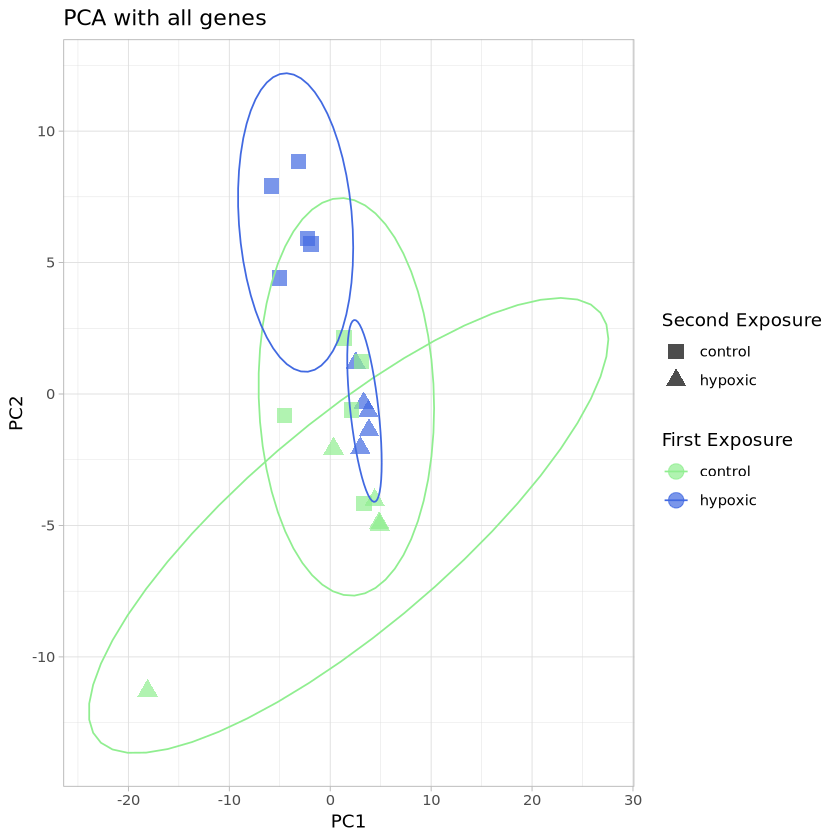

In [35]:
# Transform data using variance stabilizing transformation (VST)
vsd <- vst(dds)

# Extract treatment information from colData
phase1 <- colData(dds)$Phase1
phase2 <- colData(dds)$Phase2

# Combine phase1 and phase2 to create a new factor
treatment <- paste(phase1, phase2, sep = "_")

# Perform PCA
pca_data <- prcomp(t(assay(vsd)), scale. = FALSE)

# Create a data frame for plotting
pca_df <- data.frame(
  PC1 = pca_data$x[, 1],
  PC2 = pca_data$x[, 2],
  Treatment = treatment
)

# Create PCA plot
ggplot(pca_df, aes(x = PC1, 
                y = PC2, 
                shape = phase2, 
                col = phase1)) + 
  geom_point(size =4,alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "PCA with all genes", 
     x = "PC1", y = "PC2", 
     color = "First Exposure", 
     shape = "Second Exposure") +
stat_ellipse() +
theme_light()

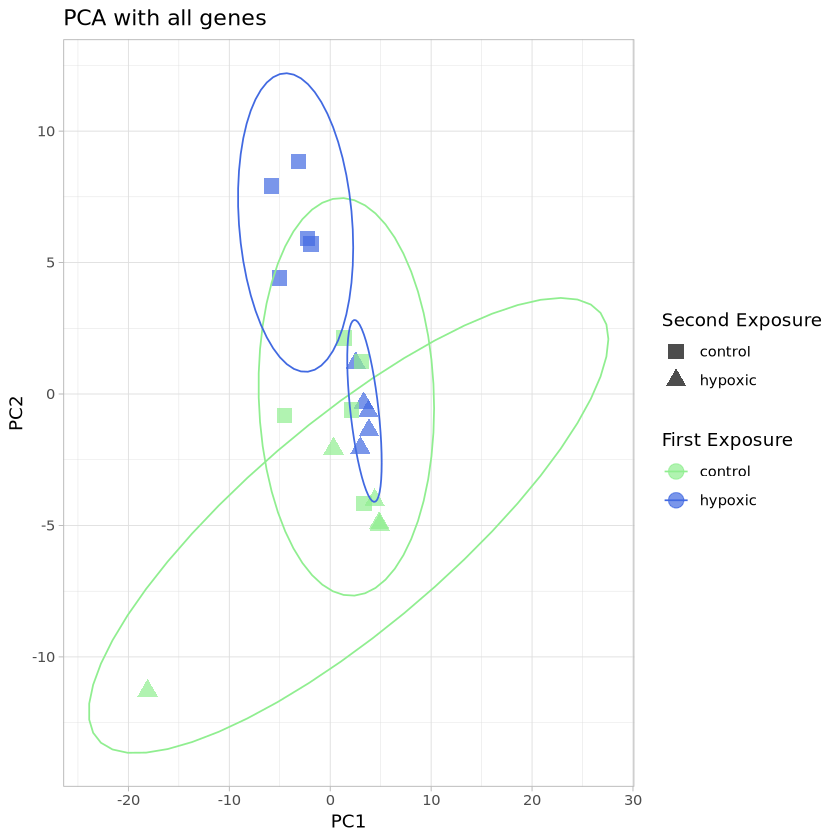

In [36]:
# Transform data using variance stabilizing transformation (VST)
vsd <- vst(dds)

# Extract treatment information from colData
phase1 <- colData(dds)$Phase1
phase2 <- colData(dds)$Phase2

# Combine phase1 and phase2 to create a new factor
treatment <- paste(phase1, phase2, sep = "_")

# Perform PCA
pca_data <- prcomp(t(assay(vsd)), scale. = FALSE)

# Create a data frame for plotting
pca_df <- data.frame(
  PC1 = pca_data$x[, 1],
  PC2 = pca_data$x[, 2],
  Treatment = treatment
)

# Create PCA plot
ggplot(pca_df, aes(x = PC1, 
                y = PC2, 
                shape = phase2, 
                col = phase1)) + 
  geom_point(size =4,alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "PCA with all genes", 
     x = "PC1", y = "PC2", 
     color = "First Exposure", 
     shape = "Second Exposure") +
stat_ellipse() +
theme_light()

look the same, just different orientation

here's a robust PCA - doesn't let outliers have as much influence...

In [37]:
library(rrcov)

Loading required package: robustbase


Attaching package: ‘robustbase’


The following object is masked from ‘package:Biobase’:

    rowMedians


The following objects are masked from ‘package:MatrixGenerics’:

    colMedians, rowMedians


The following objects are masked from ‘package:matrixStats’:

    colMedians, rowMedians


Scalable Robust Estimators with High Breakdown Point (version 1.7-6)




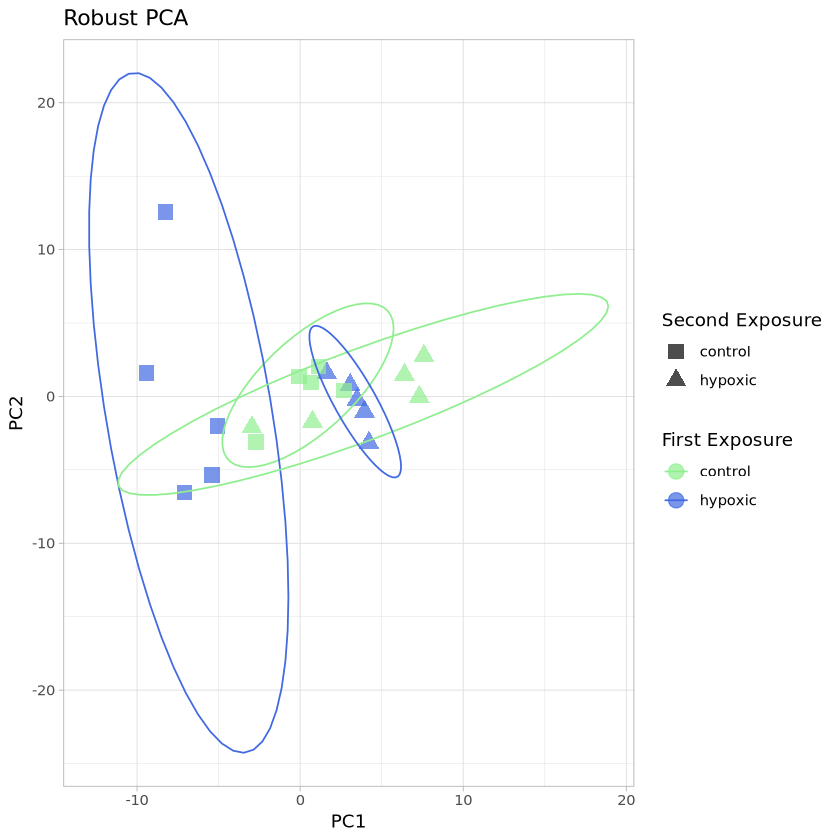

In [38]:
# Perform robust PCA
pca_data <- PcaHubert(t(assay(vsd)))

# Extract principal components
pc1 <- pca_data@scores[, 1]
pc2 <- pca_data@scores[, 2]

# Combine PCA results with sample data
pca <- data.frame(PC1 = pc1, 
                  PC2 = pc2, 
                  row.names = NULL, 
                  colData(vsd))

# Plot PCA
ggplot(pca, aes(x = PC1, 
                y = PC2, 
                shape = Phase2, 
                col = Phase1)) + 
  geom_point(size =4, 
             alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "Robust PCA", 
     x = "PC1", y = "PC2", 
     color = "First Exposure", 
     shape = "Second Exposure") +
stat_ellipse() +
theme_light()

Wright et al., 2015 had a PCA plot and then another plot including only differentially expressed genes and that's when you start to see the differences between treatments - going to try that here

so going to pull out the names of the genes that were significantly DM and subset the counts_matrix to only include the rows for those genes and then do the NMDS plot? 

### PCA plot - only significant DMGs in any pairwise comparison

pulling out DMGs with an adjusted p-value < 0.05

In [39]:
# CC vs. HC
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv')
df1 <- filter(CC_HC, padj < 0.05)
rownames(df1) <- df1$X

# CH_HC
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv')
df2 <- filter(CH_HC, padj < 0.05)
rownames(df2) <- df2$X

# HH_HC
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv')
df3 <- filter(HH_HC, padj < 0.05)
rownames(df3) <- df3$X

# HH_CH
HH_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_CH.csv')
df4 <- filter(HH_CH, padj < 0.05)
rownames(df4) <- df4$X

# HH_CC
HH_CC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HH.csv')
df5 <- filter(HH_CC, padj < 0.05)
rownames(df5) <- df5$X

# CC_CH
CC_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_CH.csv')
df6 <- filter(CC_CH, padj < 0.05)
rownames(df6) <- df6$X

# Define the list of dataframes containing DMGs
dmg_dfs <- list(df1, df2, df3, df4, df5, df6)

# Extract unique gene names from all dataframes
all_dmg_genes <- unique(unlist(lapply(dmg_dfs, function(x) rownames(x))))

Warning message in file(file, "rt"):
“cannot open file '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


robust PCA plot with only significant DMGs (in any of the pairwise comparisons)

In [ ]:
# code generated with help of Meta AI

# Define the list of dataframes containing DMGs
dmg_dfs <- list(df1, df2, df3, df4, df5, df6)

# Extract unique gene names from all dataframes
all_dmg_genes <- unique(unlist(lapply(dmg_dfs, function(x) rownames(x))))

# Subset vsd to include only DMGs
vsd_sig <- vsd[all_dmg_genes, ]

# Perform robust PCA
pca_data_sig <- PcaHubert(t(assay(vsd_sig)))

# Extract principal components
pc1_sig <- pca_data_sig@scores[, 1]
pc2_sig <- pca_data_sig@scores[, 2]

# Combine PCA results with sample data
pca_sig <- data.frame(PC1 = pc1_sig, 
                      PC2 = pc2_sig, 
                      row.names = NULL, 
                      colData(vsd_sig))

# Plot PCA            
ggplot(pca_sig, aes(x = PC1, 
                y = PC2, 
                shape = Phase2, 
                col = Phase1)) + 
  geom_point(size =4, 
             alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "Robust PCA of significant DMGs", 
     x = "PC1", y = "PC2", 
     color = "First Exposure", 
     shape = "Second Exposure") +
stat_ellipse() +
theme_light()

regular PCA plot with only significant DMGs (in any pairwise comparison) 

In [ ]:
# code generated with help of Meta AI

# Define the list of dataframes containing DMGs
dmg_dfs <- list(df1, df2, df3, df4, df5, df6)

# Extract unique gene names from all dataframes
all_dmg_genes <- unique(unlist(lapply(dmg_dfs, function(x) rownames(x))))

# Subset vsd to include only DMGs
vsd_sig <- vsd[all_dmg_genes, ]


# Perform normal PCA
pca_data <- prcomp(t(assay(vsd_sig)), scale. = TRUE)

# Extract PCA components
pc1 <- pca_data$x[, 1]
pc2 <- pca_data$x[, 2]

# Create data frame for plotting
pca <- data.frame(PC1 = pc1, PC2 = pc2, 
                  row.names = NULL, colData(vsd_sig))

# Plot PCA results
ggplot(pca, aes(x = PC1, 
                y = PC2, 
                shape = Phase2, 
                col = Phase1)) + 
  geom_point(size =4, 
             alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "PCA of significant DMGs", 
     x = "PC1", y = "PC2", 
     color = "First Exposure", 
     shape = "Second Exposure") +
stat_ellipse() +
theme_light()                  
                                      

## Heatmap

In [ ]:
vsd <- vst(dds)

In [ ]:
library(pheatmap)

In [ ]:
ntd <- normTransform(dds)

In [ ]:
# Define the list of dataframes containing DMGs
dmg_dfs <- list(df1, df2, df3, df4, df5, df6)

# Extract unique gene names from all dataframes
all_dmg_genes <- unique(unlist(lapply(dmg_dfs, function(x) rownames(x))))

# Filter counts for significant genes
sig_counts <- counts(dds, normalized=TRUE)[all_dmg_genes, ]

# Select top 20 significant genes by row mean
select_sig <- order(rowMeans(sig_counts), decreasing=TRUE)[1:20]

# Create annotation data frame
df <- as.data.frame(colData(dds)[,c("Phase2", "Phase1")])
colnames(df) <- c("Phase 2", "Phase 1")

# Define color palette
phase1_colors <- c("control" = "white", "hypoxic" = "black")
phase2_colors <- c("control" = "white", "hypoxic" = "black")

# Create heatmap
pheatmap(assay(dds)[all_dmg_genes[select_sig], ], 
         cluster_rows=FALSE, show_rownames=TRUE,
         cluster_cols=TRUE, 
         annotation_col=df,
         annotation_colors= list('Phase 1'=phase1_colors, 'Phase 2'=phase2_colors),
         main="Significant Genes Heatmap")

^ selected top 20 genes by row mean

In [ ]:
# Define the list of dataframes containing DMGs
dmg_dfs <- list(df1, df2, df3, df4, df5, df6)

# Extract unique gene names from all dataframes
all_dmg_genes <- unique(unlist(lapply(dmg_dfs, function(x) rownames(x))))

# Filter counts for significant genes
sig_counts <- counts(dds, normalized=TRUE)[all_dmg_genes, ]

# Calculate row-wise standard deviation
std_dev <- apply(sig_counts, 1, sd)

# Select top 20 genes by standard deviation
select_sig <- order(std_dev, decreasing=TRUE)[1:20]

# Create annotation data frame
df <- as.data.frame(colData(dds)[,c("Phase2", "Phase1")])
colnames(df) <- c("Phase 2", "Phase 1")

# Define color palette
phase1_colors <- c("control" = "white", "hypoxic" = "black")
phase2_colors <- c("control" = "white", "hypoxic" = "black")

# Create heatmap
pheatmap(assay(dds)[all_dmg_genes[select_sig], ], 
         cluster_rows=FALSE, show_rownames=TRUE,
         cluster_cols=TRUE, 
         annotation_col=df,
         annotation_colors= list('Phase 1'=phase1_colors, 'Phase 2'=phase2_colors),
         main="Significant Genes Heatmap")

^ selected top 20 genes with highest row-wise standard deviation

can we show all of the sig genes in a heatmap?

In [ ]:
length(all_dmg_genes) #304 total DMGs

In [ ]:
# Define color palette
phase1_colors <- c("control" = "lightgray", "hypoxic" = "black")
phase2_colors <- c("control" = "lightgray", "hypoxic" = "black")


pheatmap(assay(dds)[all_dmg_genes, ], 
         cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=TRUE, 
         annotation_col=df,
         annotation_colors= list('Phase 1'=phase1_colors, 'Phase 2'=phase2_colors),
         main="Significant Genes Heatmap")

## removing problem child

Looking at the NMDS plot (all genes), there's one point that stands out for control hypoxia and it's WBO-BBR-W03

I want to know what my data looks like if we remove that replicate

In [ ]:
head(counts_filtered)
head(meta_filtered)
dim(meta_filtered)
dim(counts_filtered)

In [ ]:
meta_WO <- filter(meta_filtered, rownames(meta_filtered) != "WBO-BBR-W03")

counts_WO <- counts_filtered[,(colnames(counts_filtered) %in% rownames(meta_WO))]

dim(meta_WO)
dim(counts_WO)
                        

so now fixed the dfs and have 19 samples instead of 20 - moving into running DESeq2

named the two input dfs as meta and counts _WO, as in without

In [ ]:
dds_WO <- DESeqDataSetFromMatrix(countData = counts_WO,
                              colData = meta_WO, 
                              design = ~ treatment)
dds_WO=DESeq(dds_WO)
resultsNames(dds_WO)

In [ ]:
# MDS plot

# normalization & transformation
vsd <- vst(dds_WO)

# calculate sample distances
sample_dists <- assay(vsd) %>%
t() %>%
dist() %>%
as.matrix()

head(sample_dists)

# calculate MDS value from distance matrix
mdsData <- data.frame(cmdscale(sample_dists))
mds <- cbind(mdsData, as.data.frame(colData(vsd))) # combine with sample data
head(mds)

# plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "NMDS plot without problem child", x = "Dimension 1", y = "Dimension 2", color = "First Exposure", shape = "Second Exposure") +
stat_ellipse() +
theme_light()

### control control vs. hypoxic hypoxic
CC vs. HH

In [ ]:
# control control vs. hypoxic hypoxic

contrast2 <- c("treatment", "hypoxic_hypoxic", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls<-lfcShrink(dds_WO, # dds object
                      contrast = contrast2, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls)

EnhancedVolcano(ls, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

1 DMGs for control control

2 DMGs for hypoxic hypoxic

In [ ]:
write.csv(as.data.frame(ls), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs_without_1sample/WO_CC_vs_HH.csv")

### hypoxic control vs. control control
HC vs. CC

In [ ]:
# hypoxic control vs. control control

contrast3 <- c("treatment", "hypoxic_control", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls2<-lfcShrink(dds_WO, # dds object
                      contrast = contrast3, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls2)

EnhancedVolcano(ls2, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

11 DMGs for hypoxic control

32 DMGs for control control

In [ ]:
write.csv(as.data.frame(ls2), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs_without_1sample/WO_CC_vs_HC.csv")

### control hypoxic vs. control control
CH vs. CC

In [ ]:
# control hypoxic vs. control control

contrast4 <- c("treatment", "control_hypoxic", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls3<-lfcShrink(dds_WO, # dds object
                      contrast = contrast4, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls3)

EnhancedVolcano(ls3, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

1 DMGs for control hypoxic

0 DMGs for control control

In [ ]:
write.csv(as.data.frame(ls3), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs_without_1sample/WO_CC_vs_CH.csv")

### hypoxic hypoxic vs. hypoxic control
HH vs. HC

In [ ]:
# hypoxic hypoxic vs. hypoxic control

contrast5 <- c("treatment", "hypoxic_hypoxic", "hypoxic_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls4<-lfcShrink(dds_WO, # dds object
                      contrast = contrast5, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls4)

EnhancedVolcano(ls4, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

160 DMGs for hypoxic hypoxic

46 DMGs for hypoxic control

In [ ]:
write.csv(as.data.frame(ls4), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs_without_1sample/WO_HH_vs_HC.csv")

### hypoxic hypoxic vs. control hypoxic
HH vs. CH

In [ ]:
# hypoxic hypoxic vs. control hypoxic

contrast6 <- c("treatment", "hypoxic_hypoxic", "control_hypoxic")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls5<-lfcShrink(dds_WO, # dds object
                      contrast = contrast6, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls5)

EnhancedVolcano(ls5, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

0 DMGs for hypoxic hypoxic

0 DMGs for control hypoxic

In [ ]:
write.csv(as.data.frame(ls5), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs_without_1sample/WO_HH_vs_CH.csv")

### hypoxic control vs. control hypoxic
HC vs. CH

In [ ]:
# hypoxic control vs. control hypoxic

contrast9 <- c("treatment", "hypoxic_control", "control_hypoxic")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls6<-lfcShrink(dds_WO, # dds object
                      contrast = contrast9, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls6)

EnhancedVolcano(ls6, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

217 DMGs for hypoxic control

308 DMGs for control hypoxic

In [ ]:
write.csv(as.data.frame(ls6), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs_without_1sample/WO_CH_vs_HC.csv")

now looking at NMDS plot of *only significant DMGs in **any** pairwise comparison*

In [ ]:
# CC vs. HC
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/WO_CC_vs_HC.csv')
df1 <- filter(CC_HC, padj < 0.05)
rownames(df1) <- df1$X

# CH_HC
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/WO_CH_vs_HC.csv')
df2 <- filter(CH_HC, padj < 0.05)
rownames(df2) <- df2$X

# HH_HC
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/WO_HH_vs_HC.csv')
df3 <- filter(HH_HC, padj < 0.05)
rownames(df3) <- df3$X

# HH_CH
HH_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/WO_HH_vs_CH.csv')
df4 <- filter(HH_CH, padj < 0.05)
rownames(df4) <- df4$X

# HH_CC
HH_CC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/WO_CC_vs_HH.csv')
df5 <- filter(HH_CC, padj < 0.05)
rownames(df5) <- df5$X

# CC_CH
CC_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/WO_CC_vs_CH.csv')
df6 <- filter(CC_CH, padj < 0.05)
rownames(df6) <- df6$X

head(df6)

robust PCA plot with only significant DMGs (in any of the pairwise comparisons)

In [ ]:


# Subset vsd to include only DMGs
vsd_sig <- vsd[all_dmg_genes, ]

# Perform robust PCA
pca_data_sig <- PcaHubert(t(assay(vsd_sig)))

# Extract principal components
pc1_sig <- pca_data_sig@scores[, 1]
pc2_sig <- pca_data_sig@scores[, 2]

# Combine PCA results with sample data
pca_sig <- data.frame(PC1 = pc1_sig, 
                      PC2 = pc2_sig, 
                      row.names = NULL, 
                      colData(vsd_sig))

# Plot PCA            
ggplot(pca_sig, aes(x = PC1, 
                y = PC2, 
                shape = Phase2, 
                col = Phase1)) + 
  geom_point(size =4, 
             alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "Robust PCA of significant DMGs", 
     x = "PC1", y = "PC2", 
     color = "First Exposure", 
     shape = "Second Exposure") +
stat_ellipse() +
theme_light()

In [ ]:
# MDS plot

# normalization & transformation
vsd <- vst(dds_WO)

# code generated with help of Meta AI

# Define the list of dataframes containing DMGs
dmg_dfs <- list(df1, df2, df3, df4, df5, df6)

# Extract unique gene names from all dataframes
all_dmg_genes <- unique(unlist(lapply(dmg_dfs, function(x) rownames(x))))

vsd_sig <- vsd[all_dmg_genes, ]

# calculate sample distances
sample_dists <- assay(vsd_sig) %>%
t() %>%
dist() %>%
as.matrix()

# calculate MDS value from distance matrix
mdsData <- data.frame(cmdscale(sample_dists))
mds <- cbind(mdsData, as.data.frame(colData(vsd_sig))) # combine with sample data
head(mds)

# plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "NMDS plot - significant DMGs without problem child", x = "Dimension 1", y = "Dimension 2", color = "First Exposure", shape = "Second Exposure") +
stat_ellipse() +
theme_light()